# Introduction to stylometry with Python 2
> You apply ‘stylometric analysis’ on texts and determine authorship of unknown texts.
- toc: true 
- badges: true
- comments: true
- author: Zeyu Guan
- categories: [spaCy, Python, Machine Learning, Data Mining, NLP, RandomForest]
- annotations: true
- image: https://d3i71xaburhd42.cloudfront.net/d25c27c7a3e9f41f150e8eadbad34c1c05d67510/9-Figure1-1.png
- hide: false

## Preparation:

[dataset](https://github.com/sbadirli/Open-Set-Authorship-Attribution)

[Python](https://www.python.org/downloads/)

[nltk](https://www.nltk.org/)

[matplotlib](https://matplotlib.org/)

## Background

Inspired by a article [Open Set Authorship Attribution toward Demystifying Victorian
Periodicals](https://arxiv.org/pdf/1912.08259.pdf), we are going to apply the three methods we used before on the new [dataset](https://github.com/sbadirli/Open-Set-Authorship-Attribution)


Authorship attribution is one of the most common uses of [Stylometry](https://en.wikipedia.org/wiki/Stylometry). It is sometimes possible to guess who wrote an anonymous text by measuring certain features, such as the average number of words per sentence or the author's proclivity to use "while" instead of "whilst," and comparing the measurements to other texts written by the suspected author. This is what we will do in this lesson, using perhaps the most famous example of disputed authorship in political writing history, the Federalist Papers, as our test case.



In [1]:
import os, random
import pandas as pd

## Top 5 authors who have the most books/articles

In [2]:
N = 0 #Total count of number of files in all directories
path = []
count = []

for dirpath, dirnames, filenames in os.walk('/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data'):
    N += len(filenames)
    path.append(dirpath)
    count.append(len(filenames))
d = {'Author':path,'Count':count}
df = pd.DataFrame(d)
top_5 = df.sort_values('Count', ascending=False).head(5)
top_5['Author'] = df['Author'].str.replace(r'/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data/', '')
top_5['Author'] = top_5['Author'].str.replace(r' - cleared', '')
author = [i for i in top_5["Author"]]
top = top_5.reset_index(drop=True)

total = 0
for i in range(len(top)):
    total += top.Count[i]
print("In total, there are " , total , "books.")

top

In total, there are  208 books.


,Author,Count
0,Margaret Oliphant,53
1,Henry Rider Haggard,45
2,Anthony Trollope,42
3,George MacDonald,34
4,Charlotte Mary Yonge,34


## Build up the dictionary

In [12]:
df = df.sort_values('Count', ascending=False).head(5)

papers = {}
keys, value = [],[]

for i in range(len(top)):
        keys.append(top.Author[i])

for i in df["Author"]:
    value.append(os.listdir(i))

papers = dict(zip(keys, value))

In [13]:
article = []
for i in df["Author"]:
    for j in range(3):
        print(f"{i}/{random.choice(os.listdir(i))}")

/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data/Margaret Oliphant - cleared/The Quiet Heart.txt
/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data/Margaret Oliphant - cleared/The Three Brothers.txt
/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data/Margaret Oliphant - cleared/The Two Marys.txt
/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data/Henry Rider Haggard - cleared/Swallow-A Tale of the Great Trek.txt
/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data/Henry Rider Haggard - cleared/King Solomon.txt
/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data/Henry Rider Haggard - cleared/Pearl-Maiden.txt
/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data/Anthony Trollope - cleared/The Belton Estate.txt
/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data/Anthony Trollope - cleared/Harry Heathcote of Gangoil.txt
/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data/Anthony Trollope - cleared/The Belton Estate.txt
/Users/

## Hold 3 articles/books and label them as unknown authors.

In [27]:
#All belongs to Margaret Oliphant
papers["Unknown"] = ['The Quiet Heart.txt', 'The Three Brothers.txt', 'The Two Marys.txt']

In [28]:
for author in papers.keys():
    print(author)
    

Margaret Oliphant
Henry Rider Haggard
Anthony Trollope
George MacDonald
Charlotte Mary Yonge
Unknown


In [29]:
# A function that compiles all of the text files associated with a single author into a single string
def read_files_into_string(filenames, author):
    strings = []
    for filename in filenames:
        with open(f"/Users/zeyu/Desktop/DS/Stylometric analysis 2/Cleaned data/{author} - cleared/{filename}") as f:
            strings.append(f.read())
    return '\n'.join(strings)

In [32]:
# Make a dictionary out of the authors' corpora
federalist_by_author = {}
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files, author)
    #print(author, files)
    print(federalist_by_author[author][:100])



CHAPTER I


Lady Caroline Beaufort was supposed to be, as life goes, an unusually
fortunate woman
﻿
PROLOGUE



Salah-ed-din, Commander of the Faithful, the king Strong to Aid,
Sovereign of the East
﻿

Chapter I

HIRAM'S HOSPITAL


The Rev. Septimus Harding was, a few years since, a beneficed
clerg
﻿
CHAPTER I: MISS HORN


"Na, na; I hae nae feelin's,  thankfu' to say. I never kent ony
guid come o
﻿


CHAPTER I.

MOTHER BUNCH.


There was once a wonderful fortnight in little Lucy's life.  One
eve
﻿


CHAPTER I.


“Ye’ll no ken, Jenny, if Miss Menie’s in?”

“And what for should I no ken?” exclaim


# Mendenhall’s Characteristic Curves of Composition

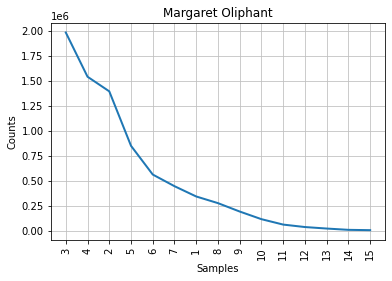

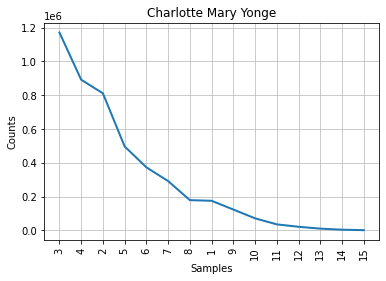

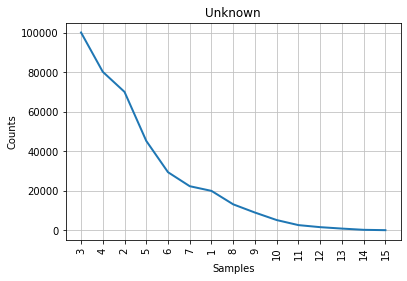

In [33]:
# Load nltk
import nltk
%matplotlib inline

# Compare the disputed papers to those written by everyone,
# including the shared ones.
#authors = ("Margaret Oliphant", "Henry Rider Haggard", "Anthony Trollope", "George MacDonald", "Charlotte Mary Yonge")
authors = ("Margaret Oliphant", "Charlotte Mary Yonge", "Unknown")
# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
for author in authors:
    tokens = nltk.word_tokenize(federalist_by_author[author])

    # Filter out punctuation
    federalist_by_author_tokens[author] = ([token for token in tokens
                                            if any(c.isalpha() for c in token)])

    # Get a distribution of token lengths
    token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
    federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    federalist_by_author_length_distributions[author].plot(15,title=author)

# Kilgariff’s Chi-Squared Method

In [34]:
# Who are the authors we are analyzing?
authors = ("Margaret Oliphant", "Charlotte Mary Yonge")

# Lowercase the tokens so that the same word, capitalized or not,
# counts as one word
for author in authors:
    federalist_by_author_tokens[author] = (
        [token.lower() for token in federalist_by_author_tokens[author]])
federalist_by_author_tokens["Unknown"] = (
    [token.lower() for token in federalist_by_author_tokens["Unknown"]])

In [35]:
print("Unknown:", len(federalist_by_author_tokens["Unknown"]), "\nMargaret Oliphant:", len(federalist_by_author_tokens["Margaret Oliphant"]), "\nCharlotte Mary Yonge:",len(federalist_by_author_tokens["Charlotte Mary Yonge"]))

Unknown: 400833 
Margaret Oliphant: 7811403 
Charlotte Mary Yonge: 4665832


In [36]:
print(federalist_by_author_tokens["Charlotte Mary Yonge"].count("the"))
print(federalist_by_author_tokens["Unknown"].count("the"))

210459
16293


In [38]:
# Calculate chisquared for each of the two candidate authors
for author in authors:

    # First, build a joint corpus and identify the 500 most frequent words in it
    joint_corpus = (federalist_by_author_tokens[author] +
                    federalist_by_author_tokens["Unknown"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(500))

    # What proportion of the joint corpus is made up
    # of the candidate author's tokens?
    author_share = (len(federalist_by_author_tokens[author])
                    / len(joint_corpus))

    # Now, let's look bat the 500 most common words in the candidate
    # author's corpus and compare the number of times they can be observed
    # to what would be expected if the author's papers
    # and the Disputed papers were both random samples from the same distribution.
    chisquared = 0

    for word,joint_count in most_common:

        # How often do we really see this common word?
        author_count = federalist_by_author_tokens[author].count(word)
        disputed_count = federalist_by_author_tokens["Unknown"].count(word)

        # How often should we see it?
        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)

        # Add the word's contribution to the chi-squared statistic

        chisquared += ((author_count-expected_author_count) *
                       (author_count-expected_author_count) /
                       expected_author_count)


        chisquared += ((disputed_count-expected_disputed_count) *
                       (disputed_count-expected_disputed_count)
                       / expected_disputed_count)
                       

    print("The Chi-squared statistic for candidate", author, "is", chisquared)

The Chi-squared statistic for candidate Margaret Oliphant is 31678.12602397497
The Chi-squared statistic for candidate Charlotte Mary Yonge is 50129.78017012059


Because the three unknown articles are all from Margaret Oliphant, as we expected, the results of Chi-Squared Method show that compared with Charlotte Mary Yonge, Margaret Oliphant's Chi-squared statistic is relatively lower, which means that The unknown article is closer to being written by Margaret Oliphant.

# John Burrows’ Delta Method (Advanced)

## 1. Feature Selection
Let's group all of the subcorpora into a single corpus so that Delta can determine a "standard" to operate with. Then, choose a few words to serve as features. Remember that we used 500 words to calculate Kilgariff's chi-squared; this time, we'll use a smaller group of 30 words as our features, with the majority, if not all, of them being function words and common verbs. The output is a sample of the most frequent words with their frequency occurence.

In [39]:
# Who are we dealing with this time?
authors = ("Margaret Oliphant", "Charlotte Mary Yonge", "Unknown")

# Convert papers to lowercase to count all tokens of the same word together
# regardless of case
for author in authors:
    federalist_by_author_tokens[author] = (
        [tok.lower() for tok in federalist_by_author_tokens[author]])

# Combine every paper except our test case into a single corpus
whole_corpus = []
for author in authors:
    whole_corpus += federalist_by_author_tokens[author]

# Get a frequency distribution
whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30))
whole_corpus_freq_dist[ :10 ]

[('the', 563740),
 ('and', 414606),
 ('to', 381479),
 ('of', 318426),
 ('a', 262137),
 ('was', 215944),
 ('her', 190855),
 ('i', 188527),
 ('in', 185949),
 ('it', 181759)]

## 2. Calculating features for each subcorpus

Consider the frequency of each characteristic in each candidate's subcorpus as a percentage of the total number of tokens in the subcorpus. We'll compute these values and store them in a dictionary of dictionaries.

In [40]:
# The main data structure
features = [word for word,freq in whole_corpus_freq_dist]
feature_freqs = {}

for author in authors:
    # A dictionary for each candidate's features
    feature_freqs[author] = {}

    # A helper value containing the number of tokens in the author's subcorpus
    overall = len(federalist_by_author_tokens[author])

    # Calculate each feature's presence in the subcorpus
    for feature in features:
        presence = federalist_by_author_tokens[author].count(feature)
        feature_freqs[author][feature] = presence / overall

## 3. Calculating feature averages and standard 
We may calculate a "mean of means" and a standard deviation for each feature based on the feature frequencies for all four subcorpora that we just computed. These values will be saved in another "dictionary of dictionaries."

In [41]:
import math

# The data structure into which we will be storing the "corpus standard" statistics
corpus_features = {}

# For each feature...
for feature in features:
    # Create a sub-dictionary that will contain the feature's mean
    # and standard deviation
    corpus_features[feature] = {}

    # Calculate the mean of the frequencies expressed in the subcorpora
    feature_average = 0
    for author in authors:
        feature_average += feature_freqs[author][feature]
    feature_average /= len(authors)
    corpus_features[feature]["Mean"] = feature_average

    # Calculate the standard deviation using the basic formula for a sample
    feature_stdev = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_stdev += diff*diff
    feature_stdev /= (len(authors) - 1)
    feature_stdev = math.sqrt(feature_stdev)
    corpus_features[feature]["StdDev"] = feature_stdev

## 4. Calculating z-scores
Following that, we convert the observed feature frequencies in the five candidates' subcorpora into z-scores that describe how much these observations deviate from the "corpus norm." Nothing special here: we just apply the z-score definition to each characteristic and save the results in yet another two-dimensional array.

In [42]:
feature_zscores = {}
for author in authors:
    feature_zscores[author] = {}
    for feature in features:

        # Z-score definition = (value - mean) / stddev
        # We use intermediate variables to make the code easier to read
        feature_val = feature_freqs[author][feature]
        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["StdDev"]
        feature_zscores[author][feature] = ((feature_val-feature_mean) /
                                            feature_stdev)

## 5. Calculating features and z-scores for our test case
Following that, we must contrast Federalist 64 with the corpus. The following code piece, which effectively summarizes what we've done so far, counts the frequency of each of our 30 characteristics in Federalist 64 and computes z-scores accordingly

In [44]:
# Tokenize the test case
testcase_tokens = nltk.word_tokenize(federalist_by_author["Unknown"])

# Filter out punctuation and lowercase the tokens
testcase_tokens = [token.lower() for token in testcase_tokens
                   if any(c.isalpha() for c in token)]

# Calculate the test case's features
overall = len(testcase_tokens)
testcase_freqs = {}
for feature in features:
    presence = testcase_tokens.count(feature)
    testcase_freqs[feature] = presence / overall

# Calculate the test case's feature z-scores
testcase_zscores = {}
for feature in features:
    feature_val = testcase_freqs[feature]
    feature_mean = corpus_features[feature]["Mean"]
    feature_stdev = corpus_features[feature]["StdDev"]
    testcase_zscores[feature] = (feature_val - feature_mean) / feature_stdev
    print("Test case z-score for feature", feature, "is", testcase_zscores[feature])

Test case z-score for feature the is -1.0369726989750698
Test case z-score for feature and is -0.0497886780777791
Test case z-score for feature to is -0.716019896234939
Test case z-score for feature of is -0.18990991549542452
Test case z-score for feature a is 0.6613199834721966
Test case z-score for feature was is -0.3500319869503652
Test case z-score for feature her is 0.45610358244051996
Test case z-score for feature i is 1.1196025205302194
Test case z-score for feature in is 0.35371101557558254
Test case z-score for feature it is 0.7725432211572801
Test case z-score for feature that is -1.1366067448556416
Test case z-score for feature he is 0.06731668473266669
Test case z-score for feature she is -0.7205299908077945
Test case z-score for feature you is 0.4725705063722008
Test case z-score for feature had is -0.8082846743848723
Test case z-score for feature not is 0.19768017034008217
Test case z-score for feature his is -0.8516173968989288
Test case z-score for feature with is 0.688

## 6. Calculating Delta
Finally, we utilize Burrows' Delta calculation to get a single score comparing Federalist 64 to each of the five "possible writers." Reminder: the lower the Delta score, the more similar the stylometric signature of Federalist 64 is to the candidate's.

In [45]:
for author in authors:
    delta = 0
    for feature in features:
        delta += math.fabs((testcase_zscores[feature] -
                            feature_zscores[author][feature]))
    delta /= len(features)
    print( "Delta score for candidate", author, "is", delta )

Delta score for candidate Margaret Oliphant is 0.8130300274650515
Delta score for candidate Charlotte Mary Yonge is 1.500105975962623
Delta score for candidate Unknown is 0.0
